
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 23rd, submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;"> Tianxin Huang (th29885); Rulan Pan (rp33973) </p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please make sure that **your filename includes your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1a - Stochastic Gradient Descent (25pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.

$h(x_i)=w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$ for $x_i= \begin{vmatrix}x_{i1} \\x_{i2}\end{vmatrix}$


$Loss(w)=(h(x_i)-t_i)^2$

$\frac{\partial Loss(w)}{\partial w_k}= 2\frac{\partial h(x_i)}{\partial w_k}(h(x_i)-t_i)$  for k= 0,1,2,3

For k=0

$\frac{\partial h(x_i)}{\partial w_0}=1$
    
$\frac{\partial Loss(w)}{\partial w_0}=2(h(x_i)-t_i)$
    
$w_0=w_0-2\eta(h(x_i)-t_i)$

For k=1

$\frac{\partial h(x_i)}{\partial w_1}=x_{i1}$
    
$\frac{\partial Loss(w)}{\partial w_1}=2x_{i1}(h(x_i)-t_i)$
    
$w_1=w_1-2\eta x_{i1}(h(x_i)-t_i)$

For k=2

$\frac{\partial h(x_i)}{\partial w_2}=x_{i1}^2$
    
$\frac{\partial Loss(w)}{\partial w_2}=2x_{i1}^2(h(x_i)-t_i)$
    
$w_2=w_2-2\eta x_{i1}^2(h(x_i)-t_i)$

For k=3

$\frac{\partial h(x_i)}{\partial w_3}=x_{i1}x_{i2}$
    
$\frac{\partial Loss(w)}{\partial w_3}=2x_{i1}x_{i2}(h(x_i)-t_i)$
    
$w_3=w_3-2\eta x_{i1}x_{i2}(h(x_i)-t_i)$

2. (15pts) Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'rmsprop'(Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and RMSProp. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and RMSProp (6 plots total).


In [4]:
from sklearn.utils import shuffle
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
class sgd:
    def __init__(self, rate, reg, num_e):
        self.rate = rate
        self.reg = reg
        self.num_e = num_e
    
    def fit(self, X_train, t, rule):
        # Initialize the w 
        weights = np.array([0]*4)
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]  
        
        v = np.array([0]*4)
        v0 = v[0]
        v1 = v[1]
        v2 = v[2]
        v3 = v[3] 
        
        ch = np.array([0]*4)
        ch0 = ch[0]
        ch1 = ch[1]
        ch2 = ch[2]
        ch3 = ch[3]  
        class_weight_list=[]
        for epoch in range(self.num_e):
            #X,t = shuffle(X_train,t_train) 
            for i in range(len(X)):
                yi = w0 + (w1*X[i][0]) + (w2*X[i][0]*X[i][0]) + (w3*X[i][0]*X[i][1])
                
                grad0=2*(yi - t[i])+2*self.reg*w0
                grad1=2*(yi - t[i])*X[i][0]+2*self.reg*w1
                grad2=2*(yi - t[i])*(X[i][0]*X[i][0])+2*self.reg*w2
                grad3=2*(yi - t[i])*(X[i][0]*X[i][1])+2*self.reg*w3
                
                if rule == 'sgd':
                    w0 = w0-self.rate*grad0
                    w1 = w1-self.rate*grad1
                    w2 = w2-self.rate*grad2
                    w3 = w3-self.rate*grad3
                elif rule == 'sgd_momentum':
                    v0 = 0.9*v0 - self.rate*grad0                    
                    v1 = 0.9*v1 - self.rate*grad1
                    v2 = 0.9*v2 - self.rate*grad2
                    v3 = 0.9*v3 - self.rate*grad3
                    w3 = w0 + v0
                    w1 = w1 + v1                    
                    w2 = w2 + v2
                    w3 = w3 + v3          
                elif rule == 'rmsprop':
                    ch0 = 0.9*ch0 + 0.1*grad0*grad0
                    ch1 = 0.9*ch1 + 0.1*grad1*grad1                    
                    ch2 = 0.9*ch2 + 0.1*grad2*grad2
                    ch3 = 0.9*ch3 + 0.1*grad3*grad3                    
                    w0 = w0 - ((self.rate)/sqrt(ch0+1e-6))*grad0
                    w1 = w1 - ((self.rate)/sqrt(ch1+1e-6))*grad1                   
                    w2 = w2 - ((self.rate)/sqrt(ch2+1e-6))*grad2
                    w3 = w3 - ((self.rate)/sqrt(ch3+1e-6))*grad3                                 
                weight = [w0, w1, w2, w3]
            class_weight_list.append(weight)  
        self.weights = weight
        self. class_weight_list = class_weight_list          
        
    def pred(self, X):
        
        y_pred = []
        for xi in X:
            yi = self.weights[0] + (self.weights[1]*xi[0]) + (self.weights[2]*xi[0]*xi[0]) + (self.weights[3]*xi[0]*xi[1])
            y_pred.append(yi)
        self.y_pred = y_pred
        return y_pred
        
        

In [6]:
data = pd.read_csv('samples.csv')
X = np.array(data[['x1','x2']])
y = np.array(data['y'])

In [7]:
rate_list = [.0001, .001, .01]
reg_list = [0,10,100] 

list_sgd = []
for eta in rate_list:
    for reg in reg_list:
        model = sgd(eta, reg, 15)
        model.fit(X,y, 'sgd')
        mse_i = mse(model.pred(X),y)
        t_combine = (mse_i, reg, eta)
        list_sgd.append(t_combine)

/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [8]:
rate_list = [.0001, .001, .01]
list_mom = []
for eta in rate_list:
    for reg in reg_list:
        model = sgd(eta, reg, 15)
        model.fit(X,y, 'sgd_momentum')
        mse_i = mse(model.pred(X),y)
        t_combine = (mse_i, reg, eta)
        list_mom.append(t_combine)

/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [9]:
rate_list = [.0001, .001, .01, 0.1, 1, 10, 100]
list_rmsp = []
for eta in rate_list:
    for reg in reg_list:
        model = sgd(eta, reg, 15)
        model.fit(X,y, 'rmsprop')
        mse_i = mse(model.pred(X),y)
        t_combine = (mse_i, reg, eta)
        list_rmsp.append(t_combine)

3. (2pts) Report the MSE at the end of 15 epochs for both combinations.

In [37]:
print('For SGD, mse, regulation parameter, learning rate: \n',sorted(list_sgd,key=lambda x:x[0])[:2])
print('For SGD-Momentum, mse, regulation parameter, learning rate: \n',sorted(list_mom,key=lambda x:x[0])[:2])
print('For RMSProp, mse, regulation parameter, learning rate: \n',sorted(list_rmsp,key=lambda x:x[0])[:2])

('For SGD, mse, regulation parameter, learning rate: \n', [(0.0035435745951305246, 0, 0.001), (0.303489380724702, 0, 0.0001)])
('For SGD-Momentum, mse, regulation parameter, learning rate: \n', [(1.7391211895048548, 0, 0.0001), (5.4468597257477835, 10, 0.0001)])
('For RMSProp, mse, regulation parameter, learning rate: \n', [(0.0783961529763714, 0, 0.01), (1.7162396077106914, 10, 0.1)])


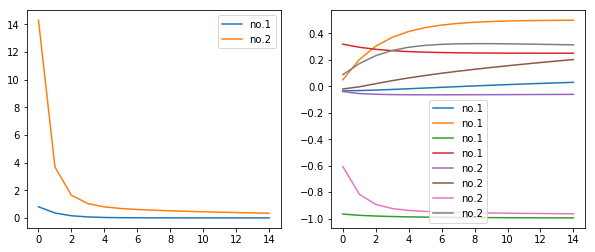

In [10]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

model1 = sgd(0.001, 0, 15)
model1.fit(X,y, 'sgd')

model2 = sgd(0.0001, 0, 15)
model2.fit(X,y, 'sgd')

l = []
l2 = []
for i in range(15):
    coef = model1.class_weight_list[i]
    yhat = coef[0] + (coef[1]*X_df[0]) + (coef[2]*X_df[0]*X_df[0]) + (coef[3]*X_df[0]*X_df[1])
    mse_i = mse(yhat,y)
    l.append(mse_i)

l2 = []
for i in range(15):
    coef = model2.class_weight_list[i]
    yhat = coef[0] + (coef[1]*X_df[0]) + (coef[2]*X_df[0]*X_df[0]) + (coef[3]*X_df[0]*X_df[1])
    mse_i = mse(yhat,y)
    l2.append(mse_i)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(l,label = 'no.1')
plt.plot(l2,label = 'no.2')
plt.legend()
plt.subplot(122)
plt.plot(model1.class_weight_list,label = 'no.1')
plt.plot(model2.class_weight_list,label = 'no.2')
plt.legend()


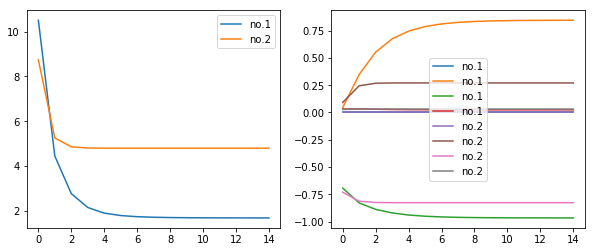

In [11]:
model1 = sgd(0.0001, 0, 15)
model1.fit(X,y, 'sgd_momentum')

model2 = sgd(0.0001, 10, 15)
model2.fit(X,y, 'sgd_momentum')

l = []
l2 = []
for i in range(15):
    coef = model1.class_weight_list[i]
    yhat = coef[0] + (coef[1]*X_df[0]) + (coef[2]*X_df[0]*X_df[0]) + (coef[3]*X_df[0]*X_df[1])
    mse_i = mse(yhat,y)
    l.append(mse_i)

l2 = []
for i in range(15):
    coef = model2.class_weight_list[i]
    yhat = coef[0] + (coef[1]*X_df[0]) + (coef[2]*X_df[0]*X_df[0]) + (coef[3]*X_df[0]*X_df[1])
    mse_i = mse(yhat,y)
    l2.append(mse_i)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(l,label = 'no.1')
plt.plot(l2,label = 'no.2')
plt.legend()
plt.subplot(122)
plt.plot(model1.class_weight_list,label = 'no.1')
plt.plot(model2.class_weight_list,label = 'no.2')
plt.legend()

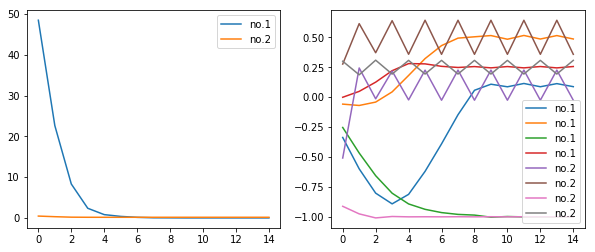

In [12]:
model1 = sgd(0.01, 0, 15)
model1.fit(X,y, 'rmsprop')

model2 = sgd(0.1, 0, 15)
model2.fit(X,y, 'rmsprop')

l = []
l2 = []
for i in range(15):
    coef = model1.class_weight_list[i]
    yhat = coef[0] + (coef[1]*X_df[0]) + (coef[2]*X_df[0]*X_df[0]) + (coef[3]*X_df[0]*X_df[1])
    mse_i = mse(yhat,y)
    l.append(mse_i)

l2 = []
for i in range(15):
    coef = model2.class_weight_list[i]
    yhat = coef[0] + (coef[1]*X_df[0]) + (coef[2]*X_df[0]*X_df[0]) + (coef[3]*X_df[0]*X_df[1])
    mse_i = mse(yhat,y)
    l2.append(mse_i)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(l,label = 'no.1')
plt.plot(l2,label = 'no.2')
plt.legend()
plt.subplot(122)
plt.plot(model1.class_weight_list,label = 'no.1')
plt.plot(model2.class_weight_list,label = 'no.2')
plt.legend()

4. (3pts) Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?

RMSProp allows for larger initial setting of learning rate. 
For stochasitc gradient descent methods, there is a problem for large learning rate because larger learning rate makes the position change in each update larger thereby missing the local optimal, which is even worse when the weights are large. So to achieve the optimal, we want to make the learning rate small when the weights are large. 

RMSProp keeps a moving average of the squared gradient for each weight. When the initial learning rate is large and the weights are large, the learning rate will be devided by the recent running average of the weights, which avoid missing the optimal.

# Notes on SGD with momentum
Momentum helps accelerate SGD in relevant direction and dampens the oscillations. It tries to maintain the direction in which the gradient vector was already pointing and adjusts the direction slowly with the new gradients. The steps can be listed below :
1. v[t] = mu * v[t-1] - (learning_rate)*(gradient)
2. w = w + v

Set mu = 0.90. Initialize v with zeros.


# Notes on RMSProp
RMSProp (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.  In particular, it uses a moving average of squared gradients as cache. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = (decay_rate)*(cache) + (1 - decay_rate)*(gradients^2) 
2. weights = weights - ((learning_rate)/sqrt(cache+1e-6))*gradients

Use decay_rate = 0.90. Initialize cache with zeros.

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

# Question 2 - Multi-layer perceptron Regressor (15 pts)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [4]:
data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target']
y = y.values         #y.as_matrix()
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((181200, 14), (181200,), (60400, 14), (60400,))


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y. 

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

1) (5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, consider the following settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (30,)*
   
   (d) *hidden_layer_sizes = (50,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.
   

In [6]:
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)
kf.split(X_train)

<generator object split at 0x10bec5960>

In [7]:
layer_list = [2,10,30,50]
def MLP_n(n):
    return MLPRegressor( hidden_layer_sizes = (n,),activation = 'tanh', solver = 'sgd', 
                 learning_rate='constant', random_state=42,batch_size=30, learning_rate_init = 0.005)

In [8]:
rmse_list = []
for n in  layer_list:  
    for train, test in kf.split(X_train):
        M = MLP_n(n)
        M.fit(X_train[train],y_train[train])
        rmse_list.append (sqrt(mse(M.predict(X_train[test]),y_train[test])))
    print('For hidden layer size',n ,'rmse is ', np.mean(rmse_list))

('For hidden layer size', 2, 'rmse is ', 270.23632573838324)
('For hidden layer size', 10, 'rmse is ', 238.93897530084928)
('For hidden layer size', 30, 'rmse is ', 219.11677341507024)
('For hidden layer size', 50, 'rmse is ', 206.8514999049625)


2) (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

In [9]:
for n in  layer_list:  
    M = MLP_n(n)
    M.fit(X_train,y_train)
    train_rmse = sqrt(mse(M.predict(X_train),y_train))
    test_rmse = sqrt(mse(M.predict(X_test),y_test))
    print('For hidden layer size',n ,'training rmse is ', train_rmse ,'test rmse is ', test_rmse)

('For hidden layer size', 2, 'training rmse is ', 266.35421927262047, 'test rmse is ', 261.89592348040935)
('For hidden layer size', 10, 'training rmse is ', 227.05583943895655, 'test rmse is ', 222.7837566399868)
('For hidden layer size', 30, 'training rmse is ', 209.49171628660778, 'test rmse is ', 208.90191331890009)
('For hidden layer size', 50, 'training rmse is ', 182.96749234517418, 'test rmse is ', 180.39534226620705)


Hidden layer size of 50 performs the best. Larger hiden layer size builds more complex model and can fit the data better thereby leading to smaller RMSE.

3) (5pts) MLPRegressor has a built-in attribute loss_curve_ which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as my_model you can call it as my_model.loss_curve_ (example). Plot three curves using below conditions (a, b, c) in one figure, where X-axis is epoch number and Y-axis is squared root of loss_curve_ valu;:

(a) hidden_layer_sizes = (1,)

(b) hidden_layer_sizes = (5,)

(c) hidden_layer_sizes = (10,)



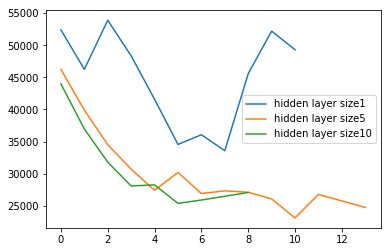

In [12]:
layers = [1,5,10]
for n in layers:
    M = MLP_n(n)
    M.fit(X_train,y_train)
    plt.plot(M.loss_curve_ ,label = 'hidden layer size'+str(n))
plt.legend(loc = 'best')
plt.show()

# Question 3 - [Kaggle Competition] Mercedes-Benz Greener Manufacturing (25 pts)

In this problem, we are going to explore a Kaggle competition: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing). Your goal is to obtain the best score you can in this competition.

The first step is to make a Kaggle account. Then find this competition and read the competition details and the description of the dataset. 

I have converted the categorical variables to numbers. The dataset is available as **'q3_train.csv'** and **'q3_test.csv'** along with the assignment. Please use this dataset for building your models. Upload your predicted values to kaggle to get the score.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any outlier and remove them).
 * Impute the missing values (if any).



In [13]:
import pandas as pd
train = pd.read_csv('q3_train.csv') 
test = pd.read_csv('q3_test.csv') 

#IQR score to filter out the outliers by keeping only valid values.
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train_no_outlier = train[(train >= (Q1 - 1.5 * IQR)) & (train <= (Q3 + 1.5 * IQR))]

#Impute missing values with mean of each column
train_1 = train_no_outlier.fillna(train_no_outlier.mean())
train_1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3.0,24,9.0,14,...,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,88.53,32,21,19,4,3.0,28,11.0,14,...,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,76.26,20,24,34,2,3.0,27,9.0,23,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,80.62,20,21,34,5,3.0,27,11.0,4,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,78.02,20,23,34,5,3.0,12,3.0,13,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 
2. Predictive Models. 
 * You have to create three models: Lasso regression, Ridge regression and multilayer perceptron. For Lasso and Ridge regression, optimize the alphas using cross validation. Multilayer perceptron can have one hidden layer. You may try other predictive models to get better scores (optional). 


In [14]:
#create x_train and y_train
x_train = train_1.drop('y', axis=1)
x_train = x_train.drop('ID', axis=1)
y_train = train_1["y"]
x_test = test.drop('ID', axis=1)

In [16]:
#Lasso Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

alphas =  10**np.linspace(10,-6,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

lasso = Lasso(random_state=0)
clf_lasso = GridSearchCV(lasso, tuned_parameters, scoring='neg_mean_absolute_error', cv=n_folds, refit=False)
clf_lasso.fit(x_train, y_train)
clf_lasso.best_params_

{'alpha': 0.005487493827465273}

In [17]:
#Run Lasso
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
lasso = linear_model.Lasso(alpha =  0.005487493827465273)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso_df = DataFrame(lasso_pred.reshape(-1, 1), columns = ['y'], index = test['ID'])
print(lasso_df.head())
lasso_df.to_csv('lasso__df.csv')

             y
ID            
1    78.090955
2    94.992014
3    80.211008
4    77.634679
5   109.251576


In [18]:
#Ridge Regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

ridge = Ridge(random_state=0)
clf_ridge = GridSearchCV(ridge, tuned_parameters, scoring='neg_mean_absolute_error',cv=n_folds, refit=False)
clf_ridge.fit(x_train, y_train)
clf_ridge.best_params_


{'alpha': 0.32896661232878277}

In [19]:
# Run Ridge
import pandas as pd
from pandas import DataFrame
ridge = linear_model.Ridge(alpha = 0.32896661232878277)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge_df = DataFrame(ridge_pred.reshape(-1, 1), columns = ['y'], index = test['ID'])
print(ridge_df.head())
ridge_df.to_csv('ridge__df.csv')

             y
ID            
1    78.217161
2    95.124130
3    80.139801
4    77.788940
5   109.311284


In [20]:
#Multilayer Perception
from sklearn.neural_network import MLPRegressor
import math
from math import sqrt
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)
kf.split(X_train)

#try on different layer size based on RMSE of the model
layer_list = [5,10,15,20,25,30,35,40,45,50,55]
def MLP_n(n):
    return MLPRegressor( hidden_layer_sizes = (n,),activation = 'tanh', solver = 'sgd', 
                 learning_rate='constant', random_state=42,batch_size=30, learning_rate_init = 0.005)
rmse_list = []
for n in  layer_list:  
    for train, test in kf.split(X_train):
        M = MLP_n(n)
        M.fit(X_train[train],y_train[train])
        rmse_list.append (sqrt(mean_squared_error(M.predict(X_train[test]),y_train[test])))
    print('For hidden layer size',n ,'rmse is ', np.mean(rmse_list))


('For hidden layer size', 5, 'rmse is ', 7.747367349184678)
('For hidden layer size', 10, 'rmse is ', 7.50624229046791)
('For hidden layer size', 15, 'rmse is ', 7.442535773414533)
('For hidden layer size', 20, 'rmse is ', 7.4154584761198254)
('For hidden layer size', 25, 'rmse is ', 7.427369442408116)
('For hidden layer size', 30, 'rmse is ', 7.463918489261136)
('For hidden layer size', 35, 'rmse is ', 7.4858765490816594)
('For hidden layer size', 40, 'rmse is ', 7.538244264708169)
('For hidden layer size', 45, 'rmse is ', 7.588129740145539)
('For hidden layer size', 50, 'rmse is ', 7.632069957059276)
('For hidden layer size', 55, 'rmse is ', 7.693375615359578)


In [ ]:
#choose hidden layer size = 20
N = MLPRegressor( hidden_layer_sizes = (20,),activation = 'tanh', solver = 'adam', 
                 learning_rate='constant', random_state=42,batch_size=30, learning_rate_init = 0.005)
N.fit(X_train,y_train)
mlp_pred = N.predict(x_test)
mlp_df = DataFrame(mlp_pred.reshape(-1, 1), columns = ['y'], index = test['ID'])
mlp_df.to_csv('mlp_df.csv')

3. Get a score of 0.51 or higher on the **Private Leaderboard**. Take a screenshot of your private score after submission as proof. You can click My Submissions tab to see the history of your submissions. It will show both Public Leaderboard & Private Leaderboard score. Your highes score should be visible in the screenshot.


Kaggle Team Name: Tianxin & Rulan

The following screenshot shows the private score, 0.52786 on our prediction by Lasso Model. This score is the highest among the 3 models that we tried, including Lasso, Ridge, and NLP.

We took the following steps in the process:
1. Data Cleaning: We computed IQR score to filter out the outliers in the data by keeping only valid values. Then we imputed missing values with mean of each column.
2. We created x_train and y_train.
3. We fitted Lasso and Ridge Model on the data and predicted y values in test set. (Cross validation to get best alpha)
4. We fitted MLP Model on the data and picked the hidden layer size of 20 based on RMSE, and then predicted y values in test set.
5. We submitted the predicting results generated by 3 models repectively to Kaggle. Two of the models were scored above 0.51.

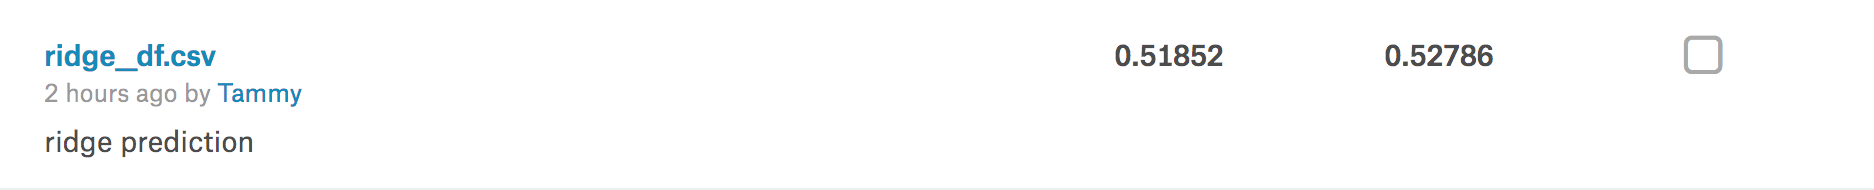

In [26]:
from IPython.display import Image
Image("Screen Shot 2018-10-25 at 10.09.50 PM.png")

# Question 4 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

## Answer

## a)
$p(x|C_i)$ Class-conditional likelihood is the distribution of the input as a varibale given the class.

$p(C_i)$ Class priors are the unconditional likelihood of one class.

$p(C_i|x)$ Posterior probability is the likelihood of one class given an input.

$p(C_i|x)=p(x|C_i)p(C_i)/p(x)$ The equation means if one class is unconditionally more frequent, the input in this class is more frequent and the the input in any class is less frequent, then the object with the input is more likely to be one of the class.

## b)
$p(C_1|x)=\frac{1}{5}p(x|C_1)/p(x)$ 

$p(C_0|x)=\frac{4}{5}p(x|C_0)/p(x)$ 

To compute boundary:

$p(C_1|x) = p(C_0|x)$(1)

$p(x|C_1) = 4p(x|C_0)$

$p(x|C_1) = 2\pi exp(-\frac{1}{2}(x_1-40)^2+(x_2-27)^2)$

$p(x|C_0) = 2\pi exp(-\frac{1}{2}(x_1-16)^2+(x_2-20)^2)$

The boundary is a straight line:

$48x_1+14x_2 = 1673+2ln4$


Text(0,0.5,'Age')

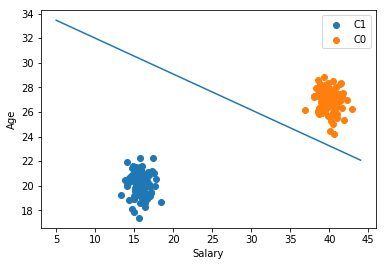

In [27]:
mean = (16, 20)
cov = [[1, 0], [0, 1]]
C1 = np.random.multivariate_normal(mean, cov, 100)
df1 = pd.DataFrame(np.array(C1))

mean = (40, 27)
C2 = np.random.multivariate_normal(mean, cov, 100)
df2 = pd.DataFrame(np.array(C2))

plt.scatter(df1[0],df1[1],label = 'C1')
plt.scatter(df2[0],df2[1],label = 'C0')

plt.plot(*zip(*[[i, (1675.8-14*i)/48] for i in range(5,45)]))
plt.legend(loc='best')
plt.xlabel('Salary')
plt.ylabel('Age')